In [1]:
from IPython.display import Image
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings("ignore")

# 결정트리 or 의사결정나무 (Decision Tree)

결정트리를 가장 단수하게 표현하자면, **Tree 구조를 가진 알고리즘**입니다.

의사결정나무는 데이터를 분석하여 데이터 사이에서 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 이 과정을 시각화 해 본다면 마치 **스무고개** 놀이와 비슷합니다.

In [2]:
Image(url="https://miro.medium.com/max/2960/1*dc_342kIsHCzuko1TtyEGQ.png", width=500)

결정트리의 기본 아이디어는 sample이 가장 섞이지 않은 상태로 완전히 분류되는 것, 다시 말해서 **엔트로피(Entropy)를 낮추도록** 만드는 것입니다.

## 엔트로피 (Entropy)

엔트로피는 쉽게 말해서 **무질서한 정도를 정량화(수치화)한 값**입니다.

다음은 **엔트로피 지수를 방이 어질러있는 정도를 예시로 들어 표현**되었습니다.

In [8]:
Image(
    url="https://image.slidesharecdn.com/entropyandthe2ndlaw-120327062903-phpapp02/95/103-entropy-and-the-2nd-law-3-728.jpg?cb=1335190079",
    width=500,
)

### 엔트로피 수식의 이해

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("white")
warnings.filterwarnings("ignore")

In [14]:
# 샘플데이터를 생성합니다.
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

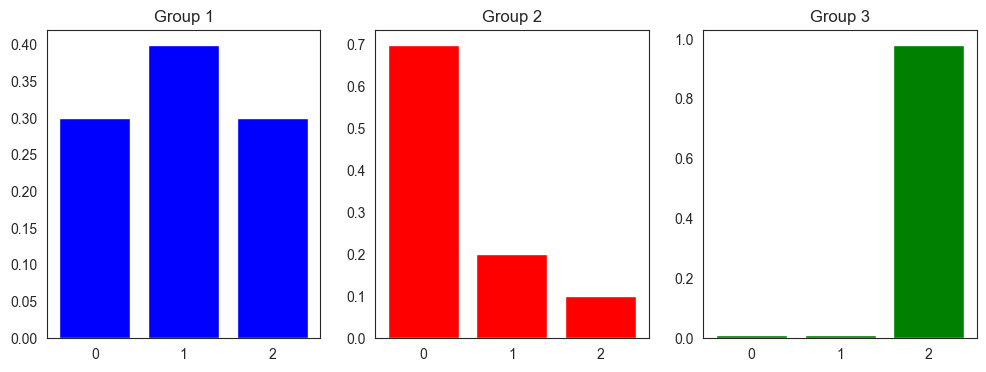

In [15]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color="blue")
axes[0].set_title("Group 1")
axes[1].bar(np.arange(3), group_2, color="red")
axes[1].set_title("Group 2")
axes[2].bar(np.arange(3), group_3, color="green")
axes[2].set_title("Group 3")
plt.show()

$\Large Entropy(p) = -\sum_{i=1}^{n}{p_i\log_2p_i}$

함수 `entropy(p)`를 정의하고 위의 공식을 구현해 주세요

In [16]:
# 코드를 입력해 주세요
def entropy(x):
    return -np.sum(x * np.log(x))

### Entropy 계산 및 시각화

In [17]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f"Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}")

Group 1: 1.089
Group 2: 0.802
Group 3: 0.112


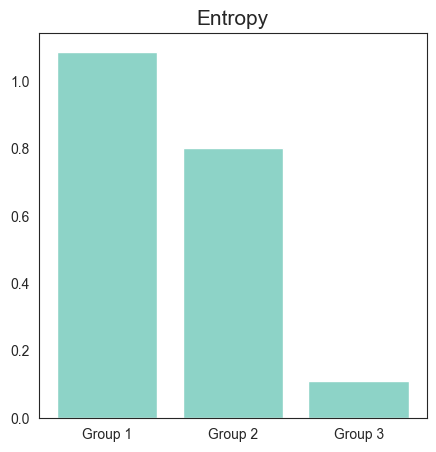

In [18]:
plt.figure(figsize=(5, 5))
plt.bar(["Group 1", "Group 2", "Group 3"], [entropy_1, entropy_2, entropy_3])
plt.title("Entropy", fontsize=15)
plt.show()

## 지니 계수 (Gini Index)

- 클래쓰들이 공평하게 섞여 있을 수록 **지니 계수**는 올라갑니다.
- Decision Tree는 지니 불순도를 낮추는 방향으로 가지치기를 진행합니다.

$\Large Gini = 1 - \sum_{i=1}^{n}{(\frac{x_i}{\sum_{i=1}^{n}{x_i}})^2}$

`gini(x)` 함수를 정의하고 내부를 위의 공식에 맞게 구현해 주세요

In [19]:
# 코드를 구현해 주세요
def gini(x):
    return 1 - ((x / x.sum()) ** 2).sum()

In [20]:
# 샘플데이터를 생성합니다.
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

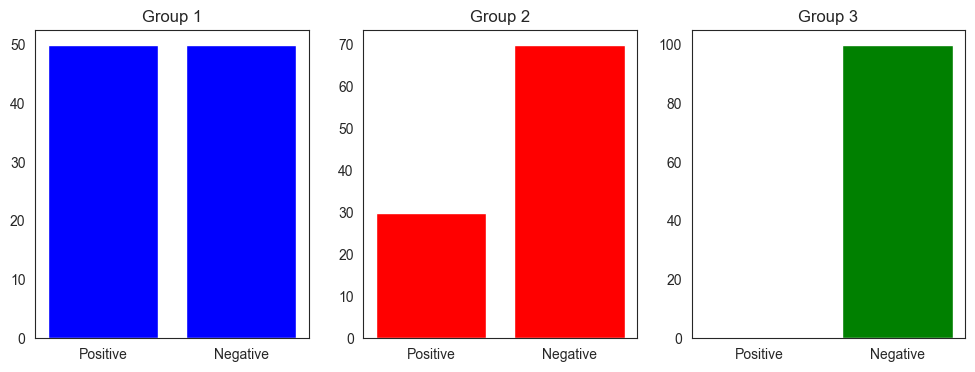

In [21]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(["Positive", "Negative"], group_1, color="blue")
axes[0].set_title("Group 1")
axes[1].bar(["Positive", "Negative"], group_2, color="red")
axes[1].set_title("Group 2")
axes[2].bar(["Positive", "Negative"], group_3, color="green")
axes[2].set_title("Group 3")
plt.show()

In [22]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f"Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}")

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


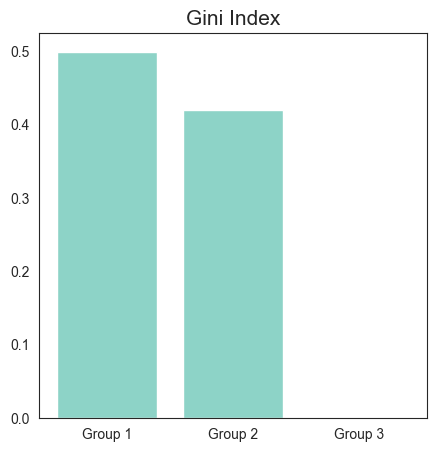

In [23]:
plt.figure(figsize=(5, 5))
plt.bar(["Group 1", "Group 2", "Group 3"], [gini_1, gini_2, gini_3])
plt.title("Gini Index", fontsize=15)
plt.show()

## Decision Tree 구현

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 123

`cancer` 변수에 `load_breast_cancer()`를 로드합니다.

In [27]:
# 데이터 로드
data = load_breast_cancer()
# 데이터 프레임 생성
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


데이터를 분할합니다.
- stratify는 `target`으로 지정합니다.
- random_state=SEED로 설정합니다.
- 기타 설정은 default를 따릅니다.

In [28]:
# x, y 분할
x = df.drop("target", axis=1)
y = df["target"]

In [29]:
# 학습, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

`x_train`, `x_test`의 shape를 확인합니다.

In [30]:
# 코드검증
x_train.shape, x_test.shape

((426, 30), (143, 30))

<p><strong>[출력 결과]</strong></p>
<pre>((426, 30), (143, 30))</pre>

DecisionTreeClassifier를 정의하고 `tree` 변수에 대입합니다.

- random_state=SEED로 설정합니다.

In [31]:
# 모델 정의
tree = DecisionTreeClassifier(random_state=SEED)
# 학습
tree.fit(x_train, y_train)
# 예측
pred = tree.predict(x_test)

학습(fit) 합니다.

In [ ]:
# 코드를 입력해 주세요

<p><strong>[출력 결과]</strong></p>
<style>#sk-container-id-1 {color: black;background-color: white;}#sk-container-id-1 pre{padding: 0;}#sk-container-id-1 div.sk-toggleable {background-color: white;}#sk-container-id-1 label.sk-toggleable__label {cursor: pointer;display: block;width: 100%;margin-bottom: 0;padding: 0.3em;box-sizing: border-box;text-align: center;}#sk-container-id-1 label.sk-toggleable__label-arrow:before {content: "▸";float: left;margin-right: 0.25em;color: #696969;}#sk-container-id-1 label.sk-toggleable__label-arrow:hover:before {color: black;}#sk-container-id-1 div.sk-estimator:hover label.sk-toggleable__label-arrow:before {color: black;}#sk-container-id-1 div.sk-toggleable__content {max-height: 0;max-width: 0;overflow: hidden;text-align: left;background-color: #f0f8ff;}#sk-container-id-1 div.sk-toggleable__content pre {margin: 0.2em;color: black;border-radius: 0.25em;background-color: #f0f8ff;}#sk-container-id-1 input.sk-toggleable__control:checked~div.sk-toggleable__content {max-height: 200px;max-width: 100%;overflow: auto;}#sk-container-id-1 input.sk-toggleable__control:checked~label.sk-toggleable__label-arrow:before {content: "▾";}#sk-container-id-1 div.sk-estimator input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 div.sk-label input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 input.sk-hidden--visually {border: 0;clip: rect(1px 1px 1px 1px);clip: rect(1px, 1px, 1px, 1px);height: 1px;margin: -1px;overflow: hidden;padding: 0;position: absolute;width: 1px;}#sk-container-id-1 div.sk-estimator {font-family: monospace;background-color: #f0f8ff;border: 1px dotted black;border-radius: 0.25em;box-sizing: border-box;margin-bottom: 0.5em;}#sk-container-id-1 div.sk-estimator:hover {background-color: #d4ebff;}#sk-container-id-1 div.sk-parallel-item::after {content: "";width: 100%;border-bottom: 1px solid gray;flex-grow: 1;}#sk-container-id-1 div.sk-label:hover label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 div.sk-serial::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 0;bottom: 0;left: 50%;z-index: 0;}#sk-container-id-1 div.sk-serial {display: flex;flex-direction: column;align-items: center;background-color: white;padding-right: 0.2em;padding-left: 0.2em;position: relative;}#sk-container-id-1 div.sk-item {position: relative;z-index: 1;}#sk-container-id-1 div.sk-parallel {display: flex;align-items: stretch;justify-content: center;background-color: white;position: relative;}#sk-container-id-1 div.sk-item::before, #sk-container-id-1 div.sk-parallel-item::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 0;bottom: 0;left: 50%;z-index: -1;}#sk-container-id-1 div.sk-parallel-item {display: flex;flex-direction: column;z-index: 1;position: relative;background-color: white;}#sk-container-id-1 div.sk-parallel-item:first-child::after {align-self: flex-end;width: 50%;}#sk-container-id-1 div.sk-parallel-item:last-child::after {align-self: flex-start;width: 50%;}#sk-container-id-1 div.sk-parallel-item:only-child::after {width: 0;}#sk-container-id-1 div.sk-dashed-wrapped {border: 1px dashed gray;margin: 0 0.4em 0.5em 0.4em;box-sizing: border-box;padding-bottom: 0.4em;background-color: white;}#sk-container-id-1 div.sk-label label {font-family: monospace;font-weight: bold;display: inline-block;line-height: 1.2em;}#sk-container-id-1 div.sk-label-container {text-align: center;}#sk-container-id-1 div.sk-container {/* jupyter's `normalize.less` sets `[hidden] { display: none; }` but bootstrap.min.css set `[hidden] { display: none !important; }` so we also need the `!important` here to be able to override the default hidden behavior on the sphinx rendered scikit-learn.org. See: https://github.com/scikit-learn/scikit-learn/issues/21755 */display: inline-block !important;position: relative;}#sk-container-id-1 div.sk-text-repr-fallback {display: none;}</style><div id="sk-container-id-1" class="sk-top-container"><div class="sk-text-repr-fallback"><pre>DecisionTreeClassifier(random_state=123)</pre><b>In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. <br />On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.</b></div><div class="sk-container" hidden><div class="sk-item"><div class="sk-estimator sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="sk-estimator-id-1" type="checkbox" checked><label for="sk-estimator-id-1" class="sk-toggleable__label sk-toggleable__label-arrow">DecisionTreeClassifier</label><div class="sk-toggleable__content"><pre>DecisionTreeClassifier(random_state=123)</pre></div></div></div></div></div>

`tree` 알고리즘을 활용하여 `x_test`에 대한 예측을 수행하고 결과를 `pred` 변수에 대입합니다.

In [ ]:
# 코드를 입력해 주세요

정확도를 측정합니다.

In [32]:
# 코드를 입력해 주세요
accuracy_score(y_test, pred)

0.9230769230769231

<p><strong>[출력 결과]</strong></p>
<pre>정확도: 0.923
</pre>

## 의사결정나무 시각화

In [34]:
!pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [37]:
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from subprocess import call
import graphviz


def show_trees(tree):
    export_graphviz(
        tree,
        out_file="tree.dot",
        class_names=["악성", "양성"],
        feature_names=data["feature_names"],
        precision=3,
        node_ids=True,
        filled=True,
    )
    # 이미지 생성 코드 추가
    call(["dot", "-Tpng", "tree.dot", "-o", "decistion-tree.png", "-Gdpi=300"])

    with open("tree.dot") as f:
        dot_graph = f.read()
    pred = tree.predict(x_test)
    print("정확도: {:.2f} %".format(accuracy_score(y_test, pred) * 100))
    display(
        graphviz.Source(dot_graph),
    )

In [38]:
show_trees(tree)

FileNotFoundError: [Errno 2] No such file or directory: 'dot'

## 주요 Hyper Parameter

### max_depth

`max_depth`는 최대 트리의 깊이를 제한 합니다.

기본 값은 None, 제한 없음 입니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### min_sample_split

`min_sample_split`은 노드 내에서 분할이 필요한 최소의 샘플 숫자입니다.

기본 값은 2입니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### min_samples_leaf

`min_samples_leaf`는 말단 노드의 최소 샘플의 숫자를 지정합니다.

기본 값은 1 입니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=7,1 min_samples_leaf=0, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### max_leaf_nodes

`max_leaf_nodes`는 말단 노드의 최대 갯수 (과대 적합 방지용)

기본 값은 None, 제한 없음 입니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### max_features

최적의 분할을 찾기 위해 고려할 피처의 수

0.8 은 80% 의 feature 만 고려하여 분할 알고리즘 적용

기본 값은 None, 모두 사용입니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=7, max_features=0.8, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

## feature의 중요도 파악

`feature_importances_` 변수를 통해서 tree 알고리즘이 학습시 고려한 feature 별 중요도를 확인할 수 있습니다.

In [39]:
tree.feature_importances_

array([0.00000000e+00, 6.12247649e-02, 1.14681446e-02, 1.88238207e-03,
       0.00000000e+00, 1.42157209e-02, 1.20415518e-02, 0.00000000e+00,
       0.00000000e+00, 6.68975102e-03, 2.30577074e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.02770122e-03,
       0.00000000e+00, 5.01731326e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.47571610e-04, 6.92201171e-01, 4.46401830e-02,
       4.73478430e-03, 0.00000000e+00, 1.73729259e-02, 1.17630263e-01,
       0.00000000e+00, 0.00000000e+00])

DataFrame으로 만들면 **중요도(feature importances) 순서로 정렬**할 수 있습니다.

In [44]:
# 코드를 입력해 주세요
df = pd.DataFrame(
    list(zip(data["feature_names"], tree.feature_importances_)),
    columns=["feature", "importance"],
).sort_values("importance", ascending=False, ignore_index=True)
df.head(20)

,feature,importance
0,worst perimeter,0.692201
1,worst concave points,0.117630
2,mean texture,0.061225
3,worst area,0.044640
4,worst concavity,0.017373
5,mean compactness,0.014216
6,mean concavity,0.012042
7,mean perimeter,0.011468
8,compactness error,0.008028
9,mean fractal dimension,0.006690


<p><strong>[출력 결과]</strong></p>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>feature</th>
      <th>importance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>worst perimeter</td>
      <td>0.698891</td>
    </tr>
    <tr>
      <th>1</th>
      <td>worst concave points</td>
      <td>0.127184</td>
    </tr>
    <tr>
      <th>2</th>
      <td>mean texture</td>
      <td>0.051780</td>
    </tr>
    <tr>
      <th>3</th>
      <td>worst area</td>
      <td>0.035233</td>
    </tr>
    <tr>
      <th>4</th>
      <td>worst texture</td>
      <td>0.026716</td>
    </tr>
    <tr>
      <th>5</th>
      <td>worst concavity</td>
      <td>0.017373</td>
    </tr>
    <tr>
      <th>6</th>
      <td>mean concavity</td>
      <td>0.012042</td>
    </tr>
    <tr>
      <th>7</th>
      <td>mean area</td>
      <td>0.011468</td>
    </tr>
    <tr>
      <th>8</th>
      <td>mean perimeter</td>
      <td>0.009407</td>
    </tr>
    <tr>
      <th>9</th>
      <td>mean concave points</td>
      <td>0.006690</td>
    </tr>
    <tr>
      <th>10</th>
      <td>area error</td>
      <td>0.003217</td>
    </tr>
    <tr>
      <th>11</th>
      <td>mean radius</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>12</th>
      <td>worst radius</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>13</th>
      <td>worst compactness</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>14</th>
      <td>worst smoothness</td>
      <td>0.000000</td>
    </tr>
  </tbody>
</table>
</div>

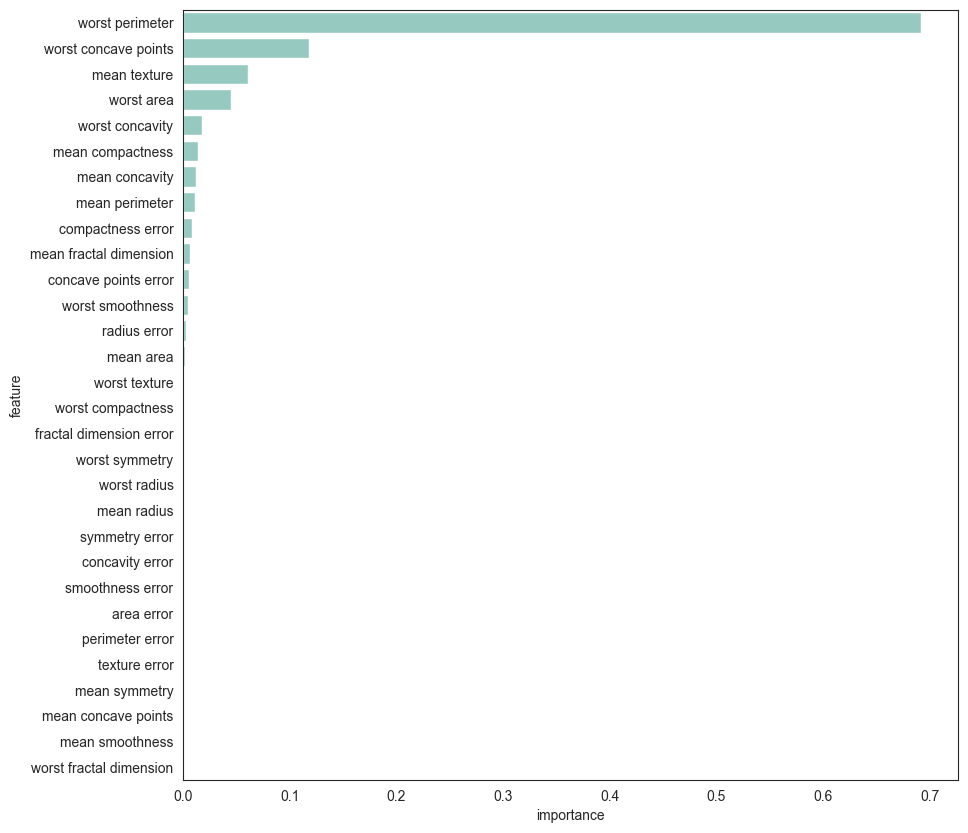

In [45]:
plt.figure(figsize=(10, 10))

sns.barplot(y="feature", x="importance", data=df)
plt.show()